In [1]:
# pip install retina-face


[notice] A new release of pip is available: 23.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt

In [8]:
img_path = "data/Teja_image0.png"

In [9]:
img = cv2.imread(img_path)

In [10]:
resp = RetinaFace.detect_faces(img_path)

In [6]:
print(resp.keys())
print(len(resp.keys()))
print(resp)

dict_keys(['face_1'])
1
{'face_1': {'score': 0.999430775642395, 'facial_area': [249, 145, 475, 434], 'landmarks': {'right_eye': [300.9578, 255.24031], 'left_eye': [405.8782, 245.97972], 'nose': [350.6843, 305.74405], 'mouth_right': [313.91382, 358.58954], 'mouth_left': [408.46762, 349.9328]}}}


In [12]:
for key in resp.keys():
    identity = resp[key]
    
    facial_area = identity["facial_area"]
    
    cv2.rectangle(img, (facial_area[2],facial_area[3]), (facial_area[0],facial_area[1]),(255,255,255),1)
    
    

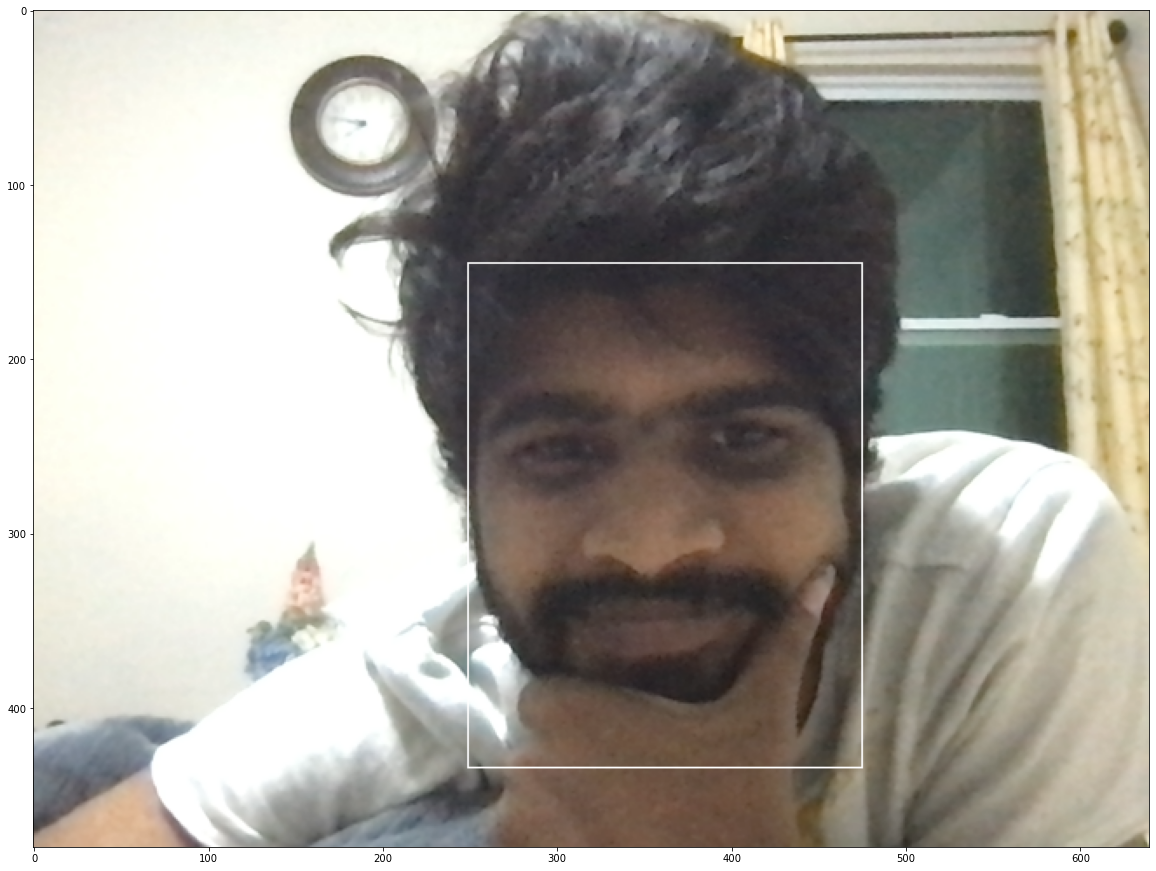

In [15]:
plt.figure(figsize=(20,20))
# plt.imshow(img)
plt.imshow(img[:,:,::-1])
plt.show()

In [16]:
# !pip3 install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 914.4 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 2.4 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.9 MB/s eta 0:00:00


  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116951 sha256=dcea38037b692abc4a76d52c762fcf98a5930cc8bb04b2470c95a5db930c1dab
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/f7/f1/89/b9ea2bf8f80ec027a88fef1d354b3816b4d3d29530988972f6
Successfully built fire

[notice] A new release of pip is available: 23.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [18]:
from deepface import DeepFace

In [21]:
# obj = DeepFace.verify(img1_path=img_path,img2_path="data/Teja_image1.png",model_name = "ArcFace",detector_backend = "retinaface")
obj = DeepFace.verify(img1_path=img_path,img2_path="data/Sathvik_image0.png",model_name = "ArcFace",detector_backend = "retinaface")

In [22]:
obj

{'verified': False,
 'distance': 0.8345539281634614,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 249, 'y': 145, 'w': 226, 'h': 289},
  'img2': {'x': 334, 'y': 207, 'w': 115, 'h': 148}},
 'time': 4.05}

dict_keys(['face_1'])
1
{'face_1': {'score': 0.9996010661125183, 'facial_area': [211, 232, 380, 453], 'landmarks': {'right_eye': [257.70895, 318.0389], 'left_eye': [338.3774, 312.4166], 'nose': [301.60147, 365.29575], 'mouth_right': [272.77768, 404.7131], 'mouth_left': [331.66513, 400.228]}}}


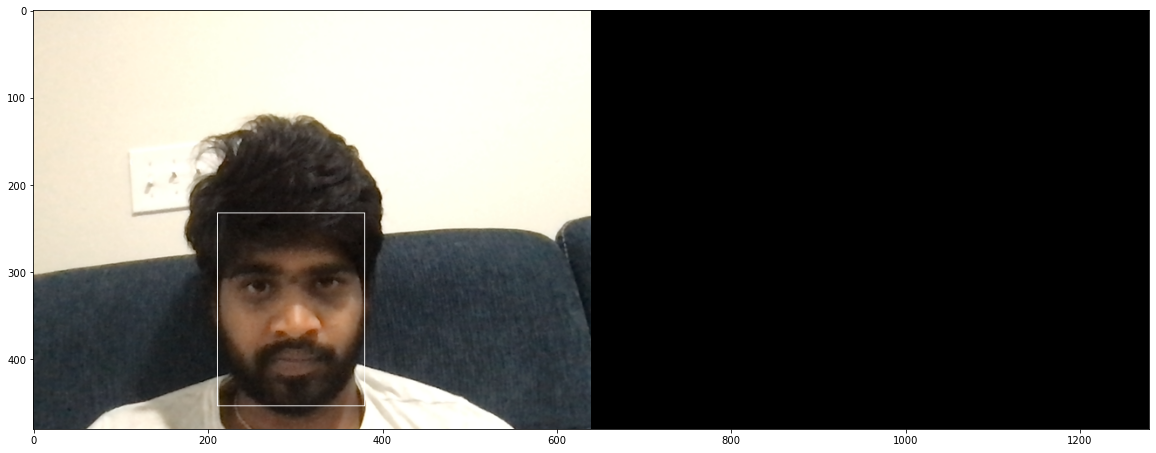

True
True
False
True
True
False
False
False
False
False
Best match is data/Teja_image3.png with distance 0.2792614826129888


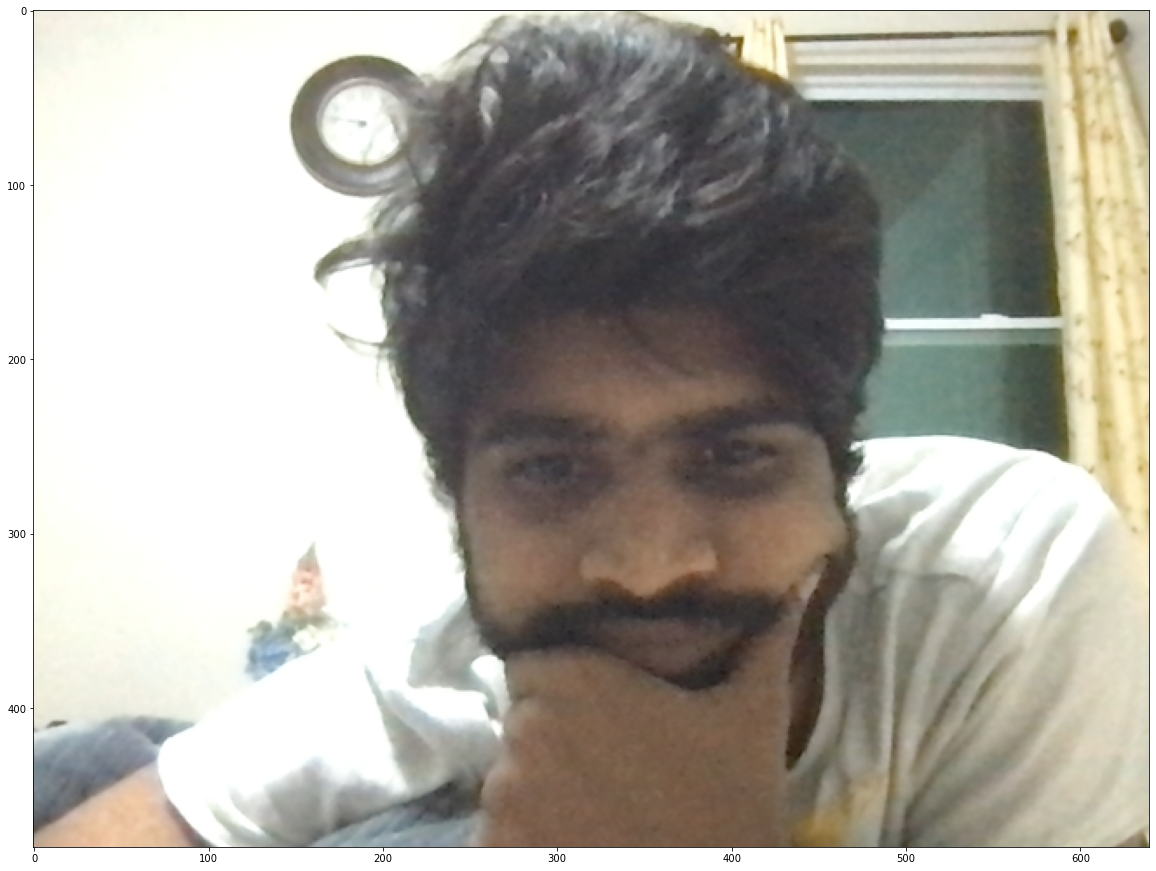

In [26]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import os

# img_path = "data/Teja_image0.png"
img_path = "Prediction_20231022_211847.png"
img = cv2.imread(img_path)
resp = RetinaFace.detect_faces(img_path)

print(resp.keys())
print(len(resp.keys()))
print(resp)

for key in resp.keys():
    identity = resp[key]
    
    facial_area = identity["facial_area"]
    cv2.rectangle(img, (facial_area[2],facial_area[3]), (facial_area[0],facial_area[1]),(255,255,255),1)

plt.figure(figsize=(20,20))
plt.imshow(img[:,:,::-1])
plt.show()

# Find the best match among all images in the folder
folder_path = "data"
best_match_distance = float('inf')  # Initialize with a high value
best_match_img_path = None

for file in os.listdir(folder_path):
    if file.endswith(('.png', '.jpg', '.jpeg')):  # Check if file is an image
        current_img_path = os.path.join(folder_path, file)
        if current_img_path != img_path:  # Avoid comparing the image with itself
            obj = DeepFace.verify(img1_path=img_path, img2_path=current_img_path, model_name="ArcFace", detector_backend="retinaface")
            print(obj["verified"])
            if 'distance' in obj and obj['distance'] < best_match_distance:
                best_match_distance = obj['distance']
                best_match_img_path = current_img_path

print(f"Best match is {best_match_img_path} with distance {best_match_distance}")

# If you want to show the best match image
best_match_img = cv2.imread(best_match_img_path)
plt.figure(figsize=(20,20))
plt.imshow(best_match_img[:,:,::-1])
plt.show()

{'verified': False,
 'distance': 0.8591530486464886,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 211, 'y': 232, 'w': 169, 'h': 221},
  'img2': {'x': 332, 'y': 214, 'w': 117, 'h': 143}},
 'time': 12.66}